In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 1000) # shows all the columns
pd.set_option('display.float_format', lambda x: '%.4f' % x) # displays outputs with 1 decimal
pd.set_option('display.max_rows', 10000) # shows all the rows
%matplotlib inline

## Basic exploration of the entire dataset

I do some basic exploration of the King county dataset to clarify the trends of the house price in the King County Housing data

In [ ]:
from google.colab import files
uploaded = files.upload() 

Saving kc_house_data-2.csv to kc_house_data-2.csv


In [ ]:
# importing the data
data=pd.read_csv('kc_house_data-2.csv')
#Viewing first 5 rows of the dataset
data.head()

id        date   price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  7129300520  10/13/2014  221900         3     1.0000         1180      5650   
1  6414100192   12/9/2014  538000         3     2.2500         2570      7242   
2  5631500400   2/25/2015  180000         2     1.0000          770     10000   
3  2487200875   12/9/2014  604000         4     3.0000         1960      5000   
4  1954400510   2/18/2015  510000         3     2.0000         1680      8080   

   floors  waterfront   view  condition  grade  sqft_above  sqft_basement  \
0  1.0000         NaN 0.0000          3      7        1180              0   
1  2.0000      0.0000 0.0000          3      7        2170            400   
2  1.0000      0.0000 0.0000          3      6         770              0   
3  1.0000      0.0000 0.0000          5      7        1050            910   
4  1.0000      0.0000 0.0000          3      8        1680              0   

   yr_built  yr_renovated  zipcode     lat      long  sqft_living15  \
0      1955        0.0000    98178 47.5112 -122.2570           1340   
1      1951     1991.0000    98125 47.7210 -122.3190           1690   
2      1933           NaN    98028 47.7379 -122.2330           2720   
3      1965        0.0000    98136 47.5208 -122.3930           1360   
4      1987        0.0000    98074 47.6168 -122.0450           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503

In [ ]:
data.shape

(21597, 21)

The data has 21K observations and 21 columns. Looking at above table, we see that 'id' seems to be an unique identifier for each sale record and sqft_living is the sum of sqft basement and sqft above

Let's get a  quick description of the data using the info() method.

Out of 21 variables : according to the data, there is  1 is categorical variable(object) and rest 20 are numerical (int/float).
However, according the data description provided with the dataset , variable such as  waterfront, view, condition, grade, yr_built, yr_renovated and zipcode are categorical varibles 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  int64  
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

### Checking if any missing values?

Missing values can be a problem for linear models so checking if any columns have any missing values. If there are, those can be resolved during data cleaning . 

Let's see what percentage of missing values are there for these columns.

In [ ]:
(data.isna().sum())/len(data)*100

id               0.0000
date             0.0000
price            0.0000
bedrooms         0.0000
bathrooms        0.0000
sqft_living      0.0000
sqft_lot         0.0000
floors           0.0000
waterfront      11.0015
view             0.2917
condition        0.0000
grade            0.0000
sqft_above       0.0000
sqft_basement    0.0000
yr_built         0.0000
yr_renovated    17.7895
zipcode          0.0000
lat              0.0000
long             0.0000
sqft_living15    0.0000
sqft_lot15       0.0000
dtype: float64

I see that features such 'waterfront' and 'yr_renovated' have around **11% and 17% of records missing and 'view' less than 1% missing**. We can resolve these during data cleaning. 

### Checking if there are any duplicated records

Here we are searching for observations which are completely identical. This is important as this can cause model to liarn bias from the duplicated samples

In [ ]:
print("# of duplicated records :",data.duplicated().sum())

# of duplicated records : 0


We see, there are no duplicated records

### Distribution of the target (price) and outlier detection

Let's see the distribution of the price.

The describe method shows , 75% percentile of the data are below $645K priced houses

In [ ]:
data['price'].describe()

count     21597.0000
mean     540296.5735
std      367368.1401
min       78000.0000
25%      322000.0000
50%      450000.0000
75%      645000.0000
max     7700000.0000
Name: price, dtype: float64

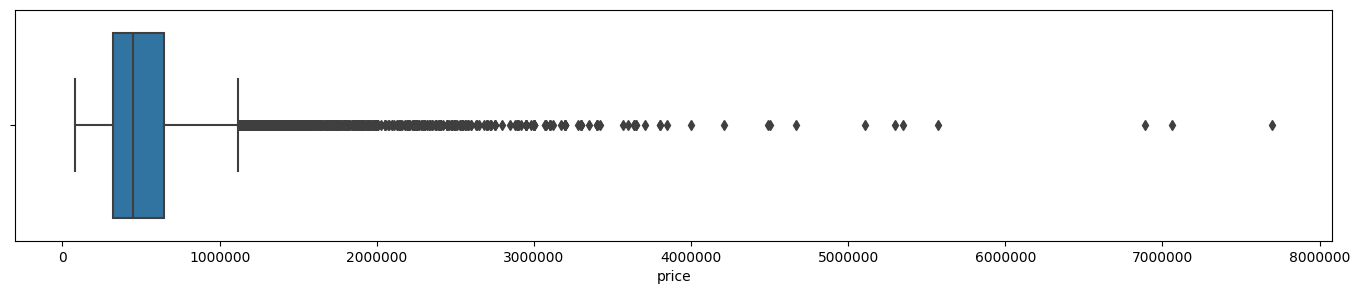

In [ ]:
fig, ax = plt.subplots(figsize=(17,3))
sns.boxplot(x='price',data=data)
plt.ticklabel_format(style='plain', axis='x')

    The house price ranges between $78,000 - $7.7 million

The real estate investors are targeting majorly in investing houses which are relevant to middle-income individuals. This ensures a steady flow of revenue for the investors as these houses are more likely to get sold off easily. So, I will keep those houses in the data which are essentially less than a million dollar or with standard 2-6 bedrooms.

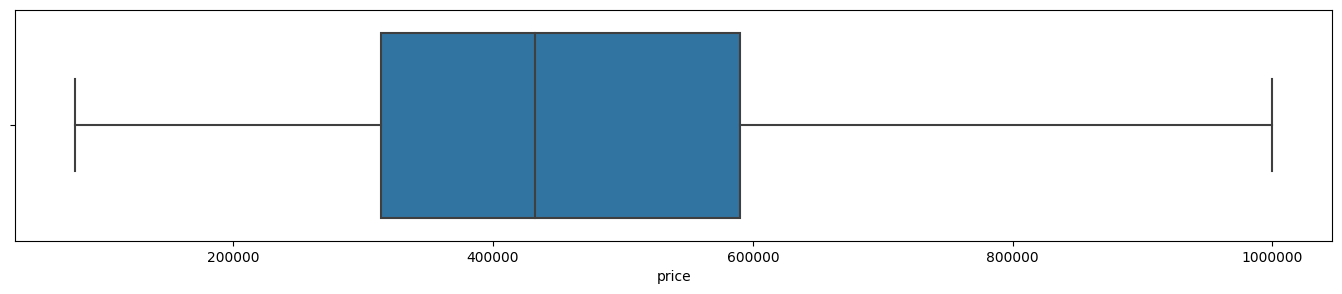

In [ ]:
data = data[(data['price']<1000000) & (data['bedrooms']<=6)]
fig, ax = plt.subplots(figsize=(17,3))
sns.boxplot(x='price',data=data)
plt.ticklabel_format(style='plain', axis='x')

    Now, the house price ranges between $78,000 - < $1 million

## Data Exploration and Cleaning

### Exploration of Numerical variables
Following table shows a description of the numerical variables where on a quick glance we see the min and max values of the numerical features and also their average value. Let's explore further by visualizing and pairing the numerical variables with price and see what kind of relation they each offer with price of the house. 

In [ ]:
# Summary of the numerical variables
numerical_vars=['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'sqft_above', 'sqft_basement','lat', 'long', 'sqft_living15', 'sqft_lot15']
data[numerical_vars].describe()

bedrooms  bathrooms  sqft_living     sqft_lot     floors  sqft_above  \
count 20060.0000 20060.0000   20060.0000   20060.0000 20060.0000  20060.0000   
mean      3.3105     2.0354    1951.2040   14512.9905     1.4705   1689.7061   
std       0.8583     0.6971     751.4189   40030.8131     0.5363    709.1000   
min       1.0000     0.5000     370.0000     520.0000     1.0000    370.0000   
25%       3.0000     1.5000    1390.0000    5000.0000     1.0000   1170.0000   
50%       3.0000     2.0000    1840.0000    7500.0000     1.0000   1500.0000   
75%       4.0000     2.5000    2400.0000   10248.5000     2.0000   2080.0000   
max       6.0000     6.0000    7120.0000 1651359.0000     3.5000   5710.0000   

       sqft_basement        lat       long  sqft_living15  sqft_lot15  
count     20060.0000 20060.0000 20060.0000     20060.0000  20060.0000  
mean        261.4980    47.5557  -122.2131      1907.6254  12383.5012  
std         402.3165     0.1418     0.1425       600.6418  26448.2356  
min           0.0000    47.1559  -122.5190       399.0000    651.0000  
25%           0.0000    47.4572  -122.3300      1460.0000   5045.7500  
50%           0.0000    47.5654  -122.2320      1790.0000   7529.0000  
75%         500.0000    47.6801  -122.1220      2260.0000   9831.2500  
max        2720.0000    47.7776  -121.3150      4950.0000 871200.0000

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


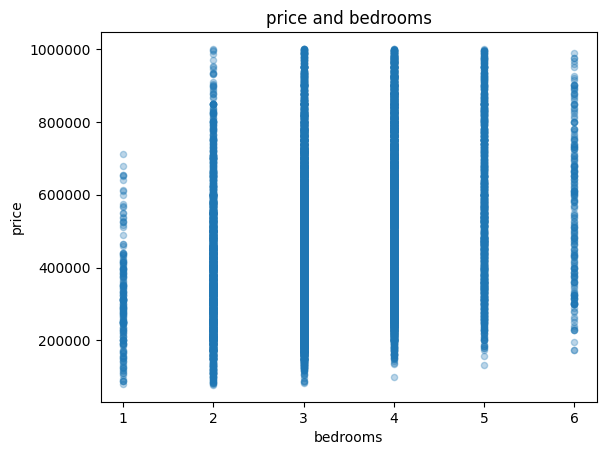

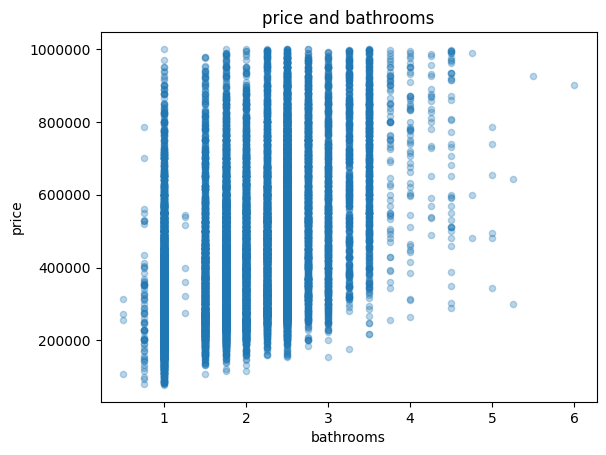

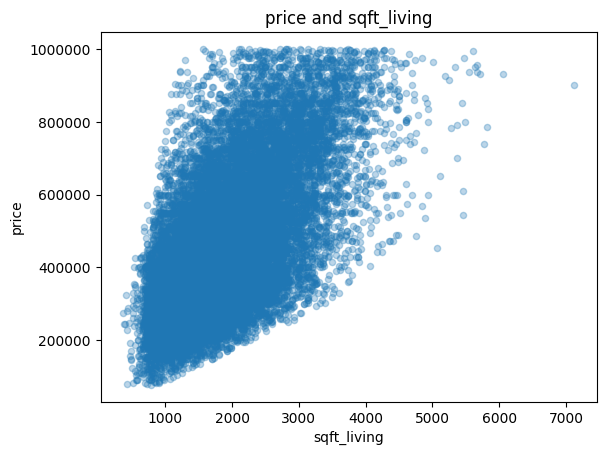

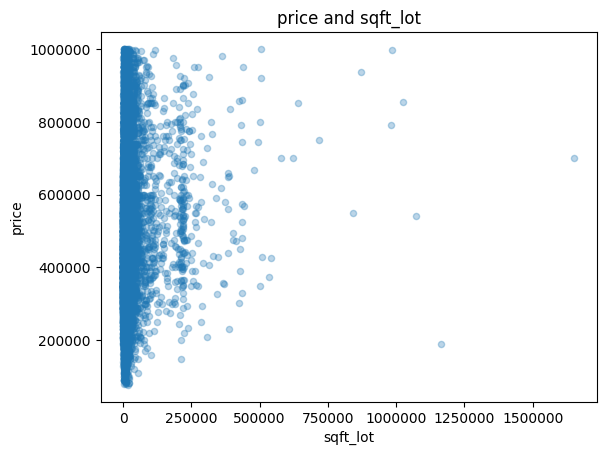

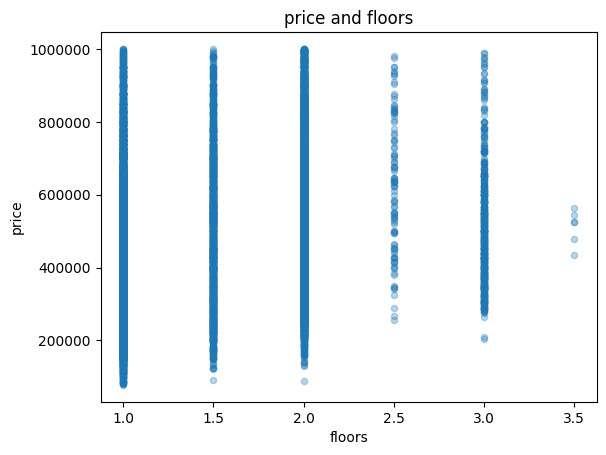

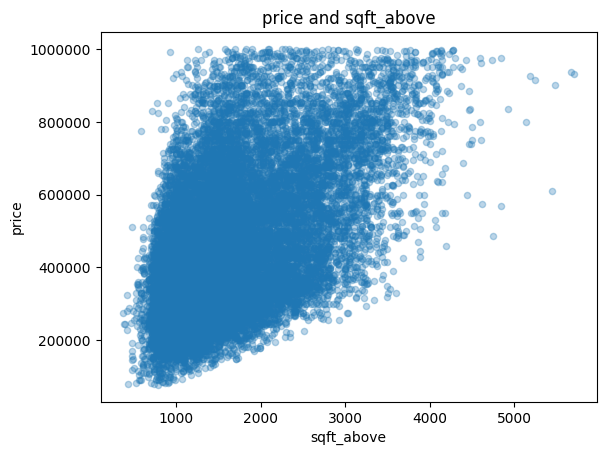

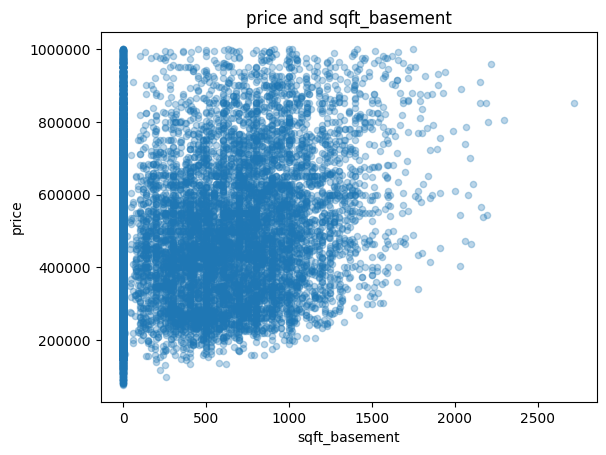

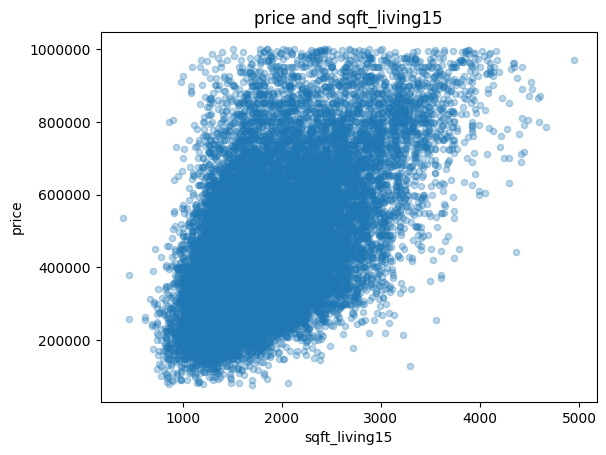

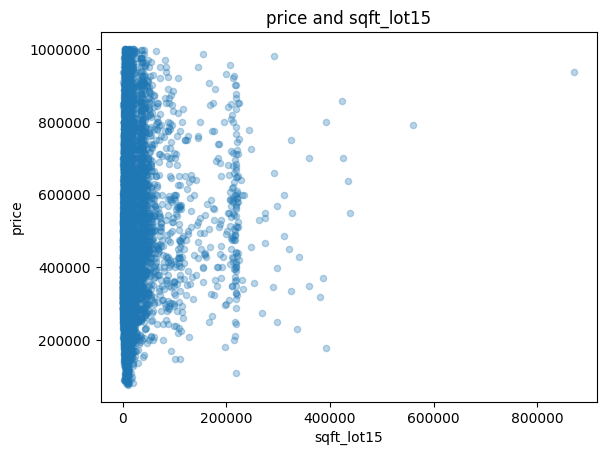

In [ ]:
num_features=['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'sqft_above', 'sqft_basement',
                                                  'sqft_living15', 'sqft_lot15']
for feature in num_features:
    data.plot(kind='scatter', x=feature, y='price', alpha=0.3)
    plt.ticklabel_format(style='plain', axis='y')
    plt.ticklabel_format(style='plain', axis='x')
#     title="price and "+ feature
    plt.title("price and {}".format(feature))

From the above set of graphs , following observations are done:

1.**Price and number of bedrooms** - Price of a house increases with the number of bedrooms . With a little dive down, we see there is a *difference of just $5K* , however this is being said by not taking into account the influence of other features in determining the price


2.**Price and bathrooms** - the relation between them seems linear, so if there are more bathrooms in the house, price of the houses also increases


3.**Price and living area(sqft) of the house** - Price of the house increases with the interior living space in sqft. They are linear in nature.


4.**Price and lot area(sqft) of the house** - Price and sqft_lot do not have any relationship. This feature doesnt seem very predictive in determining house price


5.**Price and #of floors in the house** - Price of a house increases slightly with the number of floors .


6.**Price and area above (sqft) of the house** - Price of the house increases with the living area above in sqft. They are linear in nature.


7.**Price and area of basement(sqft) of the house** - Price and sqft_basement do not have any relationship. This feature doesnt seem very predictive in determining house price


8.**Price of the house and living area of nearest 15 neighbor-houses(sqft)** - Price of the house increases with the interior  living space in sqft. They are linear in nature.


9.**Price of the house and avg lot area of nearest 15 neighbor-houses(sqft)** - Price and sqft_lot do not have any relationship. This feature doesnt seem very predictive in determining house price

 

In [ ]:
print("Difference of price between a 5-bd and 6-bd house=:",(data[(data['bedrooms']==6)]['price'].mean())-(data[(data['bedrooms']==5)]['price'].mean()));

Difference of price between a 5-bd and 6-bd house=: 5039.634921435616


### Exploration of Categorical variables
As we have seen in the description of the dataset:  date, waterfront, view, condition, grade, yr_built, yr_renovated and zipcode are categorical vars. I want to explore how may unique values each of these variables have and which levels for each of them are the most frequent. To do this, let's create a list of these features and create a temporary dataframe where we assign them as an object variable.

In [ ]:
categorical_vars=['date','waterfront', 'view', 'condition', 'grade','yr_built', 'yr_renovated', 'zipcode']
temp_df=data[categorical_vars].astype('object')
temp_df[categorical_vars].describe()

date  waterfront       view  condition  grade  yr_built  \
count       20060  17837.0000 20003.0000      20060  20060     20060   
unique        370      2.0000     5.0000          5     10       116   
top     6/23/2014      0.0000     0.0000          3      7      2014   
freq          134  17788.0000 18545.0000      13032   8922       492   

        yr_renovated  zipcode  
count     16503.0000    20060  
unique       70.0000       70  
top           0.0000    98038  
freq      15909.0000      586

#### Anayzing categorical variables and feature engineering

In [ ]:
def calculate_mean_target_per_category(df, var):
    
    """
calculates the mean price per category of a categorical variable
    """
    total_houses = len(df)

    # percentage of houses per category
    temp_df = pd.Series((df[var].value_counts() / total_houses)*100).reset_index()
    temp_df.columns = [var, 'perc_houses']

    # add the mean SalePrice
    temp_df = temp_df.merge(df.groupby([var])['price'].median().reset_index(),
                            on=var,
                            how='left')
    return temp_df

def plot_categories(df, var):
    
    """
        plots percentage of the categorical variable in the left y axis against the categories 
        with the average price of the target
    """
    fig, ax = plt.subplots(figsize=(15, 4))
    plt.xticks(df.index, df[var], rotation=90)

    ax2 = ax.twinx()
    ax.bar(df.index, df["perc_houses"], color='lightgrey')
    ax2.plot(df.index, df["price"], color='green', label='Average Sale Price')
    ax.axhline(y=5, color='red',label='5% of total house')
    ax.set_ylabel('percentage of houses per category')
    ax.set_xlabel(var)
    ax2.set_ylabel('Average Sale Price per category')
    plt.legend()
    plt.ticklabel_format(style='plain', axis='y')

*waterfront*
- houses with waterfront have a higher average sale price compared to houses with no waterfront and just comprises 5% of the totat # of houses. So, houses with missing values will be populated with 0 as that will ensure similar distribution

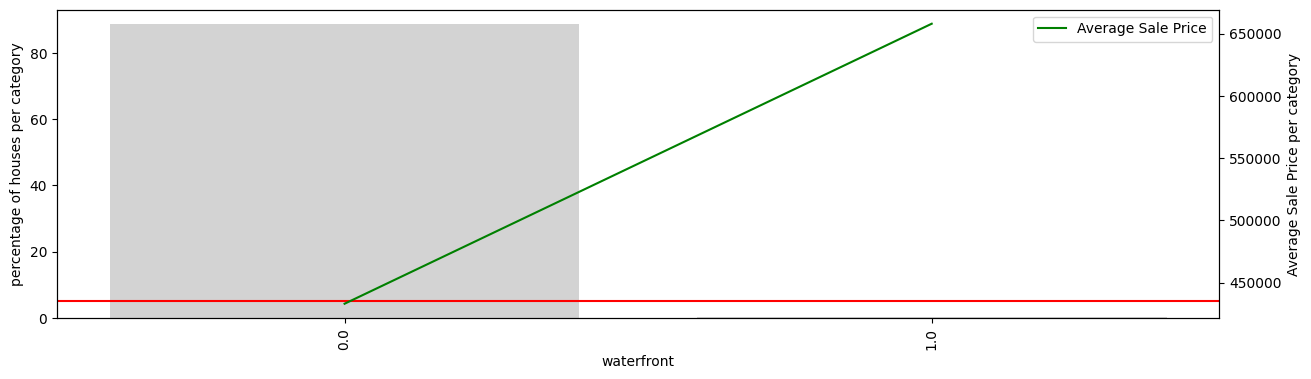

In [ ]:
temp_df = calculate_mean_target_per_category(data, 'waterfront')
plot_categories(temp_df,'waterfront')

*view*

- Better is the view of the property, higher is the price . However, better view (1-4) comprises less than 5% houses

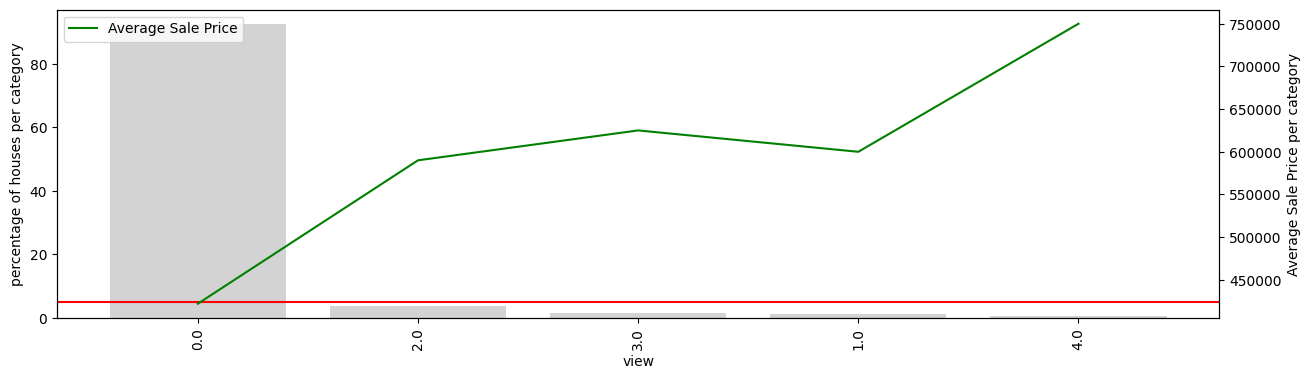

In [ ]:
temp_df = calculate_mean_target_per_category(data, 'view')
plot_categories(temp_df,'view')

*condition*
- This variable is ordinal in nature.Higher the number in condition, higher is the average sale price.
- Condition 3 houses captures the highest percentage in the market

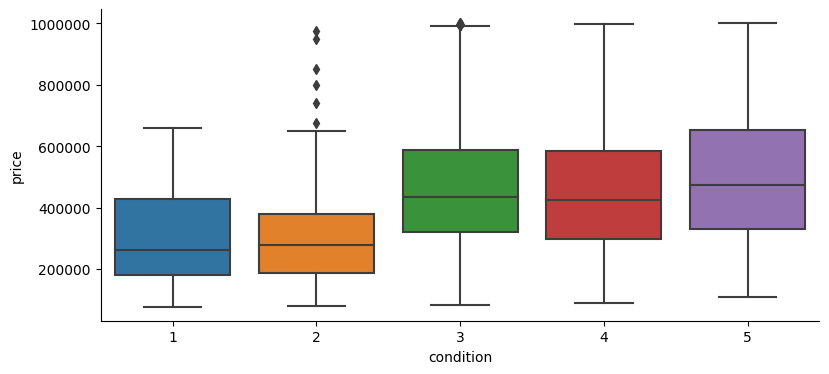

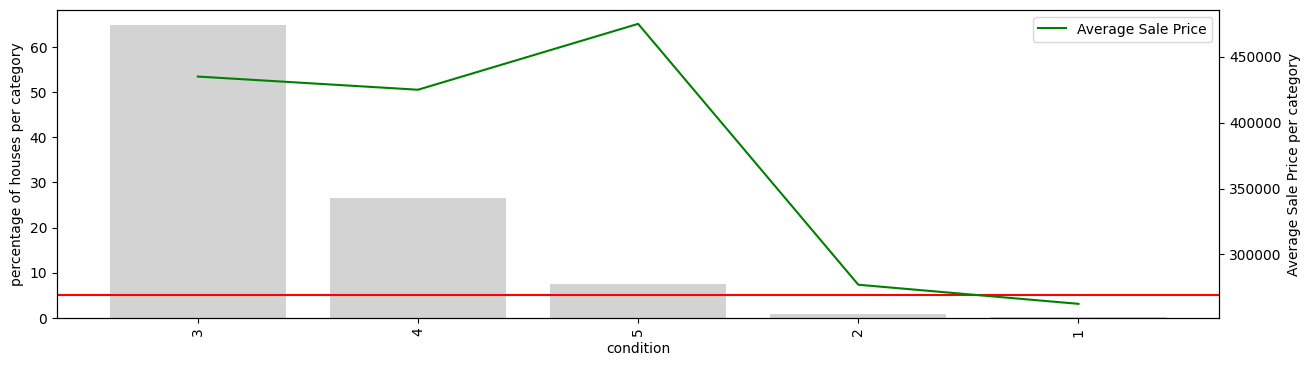

In [ ]:
sns.catplot(x='condition', y='price', data=data, kind="box", height=4, aspect=2)
plt.ticklabel_format(style='plain', axis='y')
temp_df = calculate_mean_target_per_category(data, 'condition')
plot_categories(temp_df,'condition')

*grade*
- This variable is ordinal in nature.Higher the grade of the house, higher is the average sale price. 
- Grade (7-8) occupies the maximum market. Grade (1-5) have less than 5% houses and similar avg sale price ,  and grade(10-13) have also less than 5% houses with similar average house price

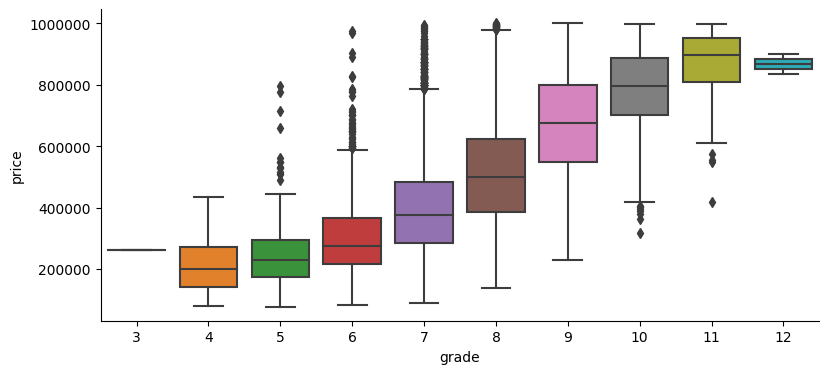

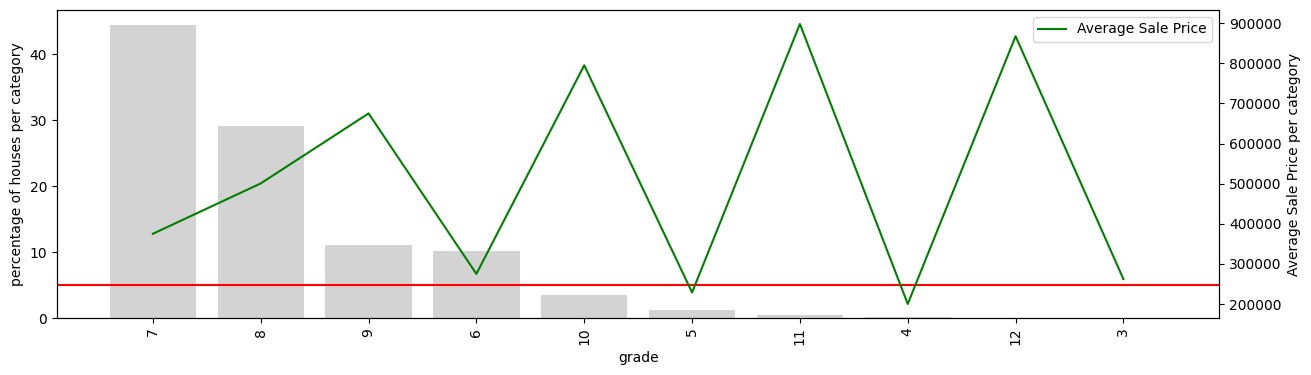

In [ ]:
sns.catplot(x='grade', y='price', data=data, kind="box", height=4, aspect=2)
plt.ticklabel_format(style='plain', axis='y')
temp_df = calculate_mean_target_per_category(data, 'grade')
plot_categories(temp_df,'grade')

*yr_renovated*
- from the below diagram we see, maximum number of houses were not renovated. Also, the price of the house does not seem to have any pattern with the year of renovation. This variable has some missing values, which will be filled with 0 as that will ensure similar distribution

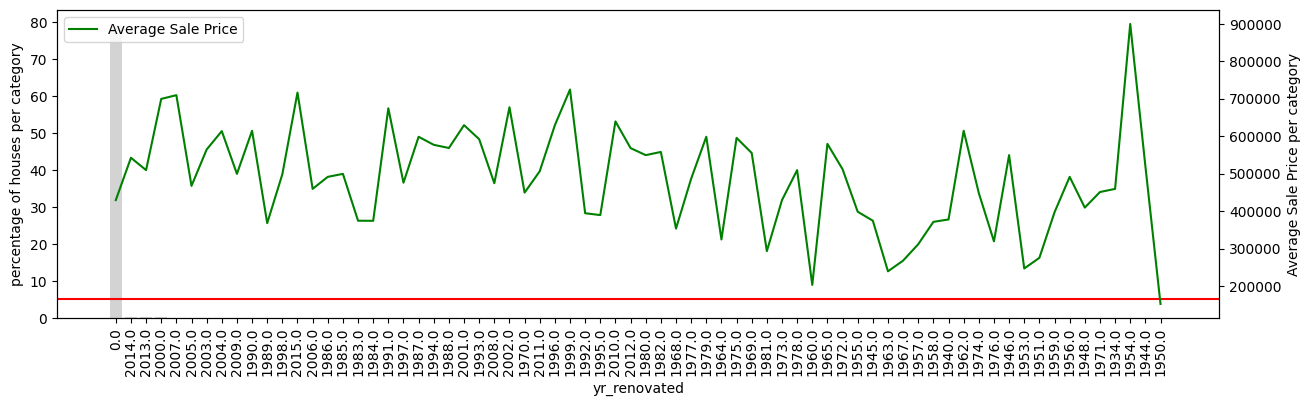

In [ ]:
temp_df = calculate_mean_target_per_category(data, 'yr_renovated')
plot_categories(temp_df,'yr_renovated')

*zipcodes*
- Since 70 categories of zipcode will increase the dimension by a lot, creating a zipcode_group based on the first 3 characters which captures specific regions/cities of the KingCounty . This reduces to 19 zipcode groups
- Based on these groups we see the average sale price of the houses are quite different form one zipcode group to another

In [ ]:
data['zipcode_group']=(data['zipcode'].astype(str).str[0:4]).astype(int)
data['zipcode_group'].nunique()

19

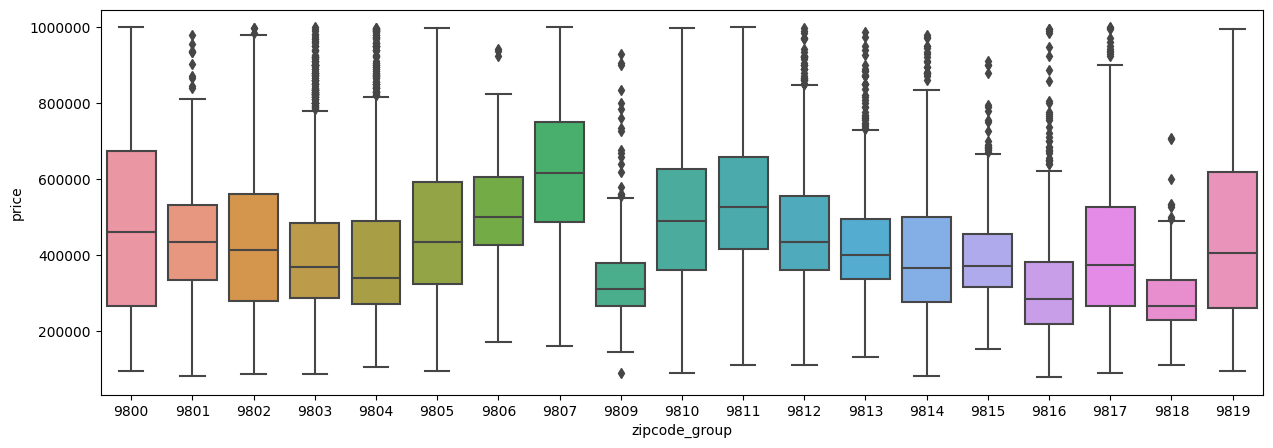

In [ ]:
# Plotting the zipcode_group
plt.figure(figsize=(15,5))
sns.boxplot(x='zipcode_group', y='price', data=data, )
plt.ticklabel_format(style='plain', axis='y');

#### Date variable
- Extracting the month feature and visualizing if there is any seasonility effect on price. This can help in generalising the model which will be used for future use
- Plotting month against price, we see more number of houses sold in summer months (April-July)

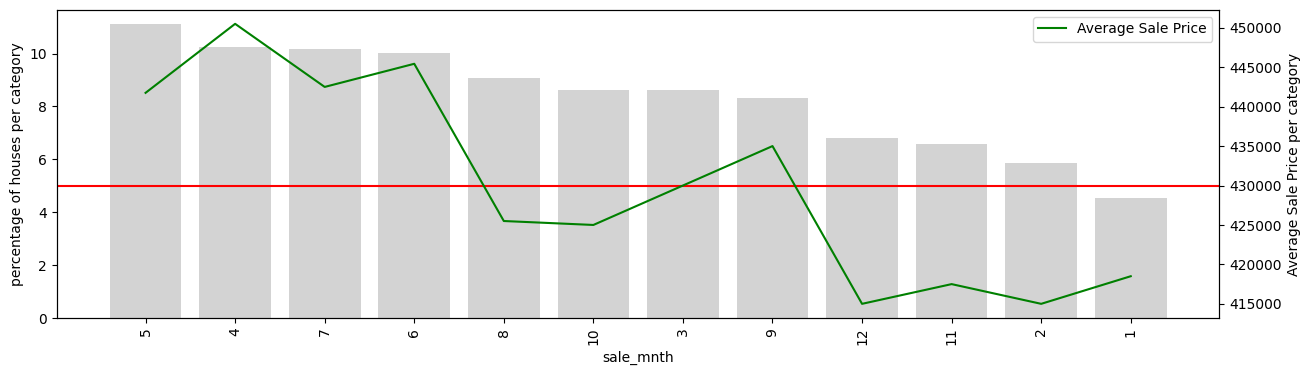

In [ ]:
data['date']=pd.to_datetime(data['date'])
data['sale_mnth']=data['date'].dt.month
temp_df = calculate_mean_target_per_category(data, 'sale_mnth')
plot_categories(temp_df,'sale_mnth')

## Visualizing the locations of houses across few features

King County is one of the expensive markets in USA and so to get a sense of the spacial pattern of houses with respective to price and condition of the house , we try to visualize that. This will help investorss to get an idea how price and present condition of these houses vary from region to region in order to take better business decisions

In [ ]:
# Function which creates a scatter plot like a map with color code
def locator(data, latitude, longitude, feature):
    
    """Create a scatterplot from lat/long data with color code.
    Parameters:
        data: dataset
        latitude: latitude values
        longitude: longitude values
        feature: the name of the column whose values you want to use as 
            the values for your color code. Pass this as a string.
    Dependencies: matplotlib
    Returns: scatterplot"""
    
    plt.figure(figsize=(15,10))
    cmap = plt.cm.get_cmap('RdYlBu')
    sc = plt.scatter(data[longitude], data[latitude], 
                     c=data[feature], vmin=min(data[feature]), 
                     vmax=max(data[feature]), alpha=0.5,s=5, cmap=cmap)
    plt.colorbar(sc)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('{} of house by location'.format(feature), fontsize=18)
    plt.show();

*Location and price*
- Cities like Seattle, Bellevue, Kirkland , Redmond have expensive mid-value houses(blue-dots) around Lake Washington. Houses near waterfront also have some high-valued homes. Less expensive one's are found on the south-west part of the County

<ipython-input-27-22643a59bf28>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('RdYlBu')


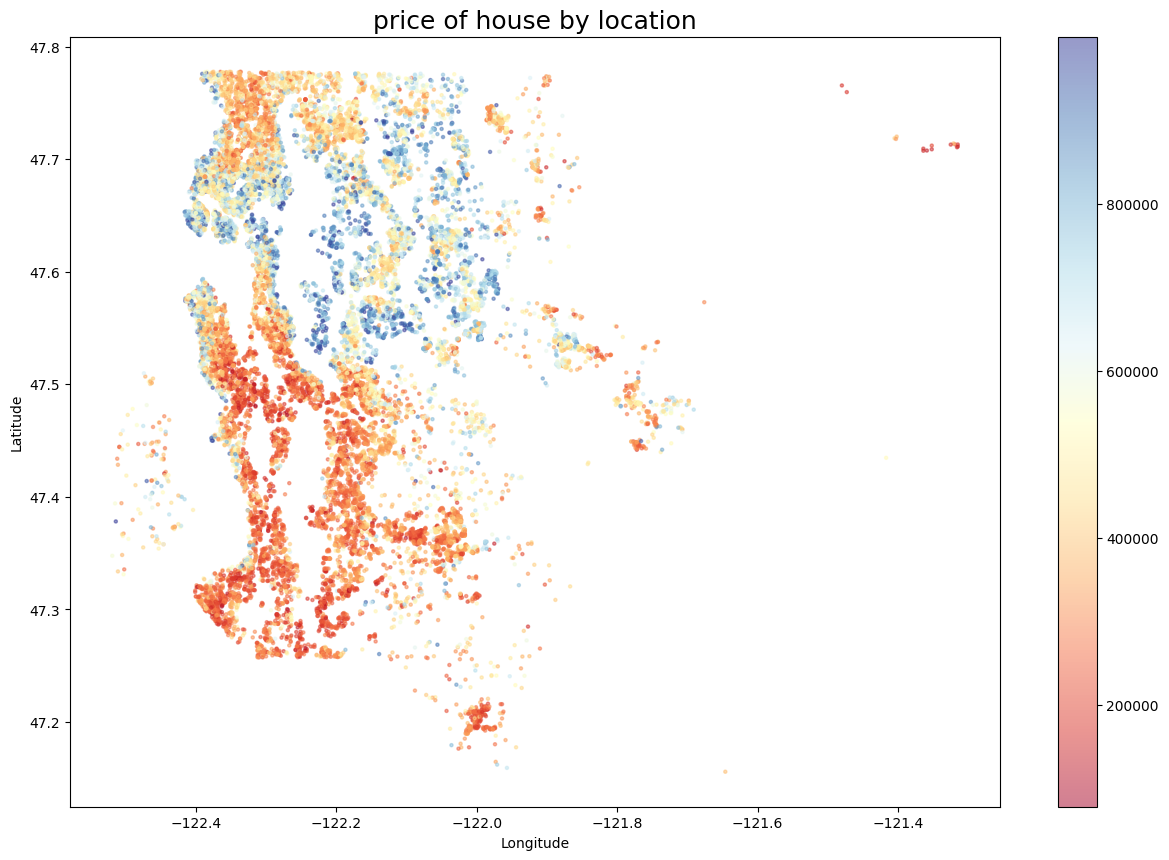

In [ ]:
locator(data, 'lat', 'long', 'price')

*Location and grade*
- The highest grade quality (9 and above) of houses are found near Bellevue and Redmond . The data contains mostly mid-grade houses between 6-8. Grade 6 and above are found all over King County, which is great for the investors

<ipython-input-27-22643a59bf28>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('RdYlBu')


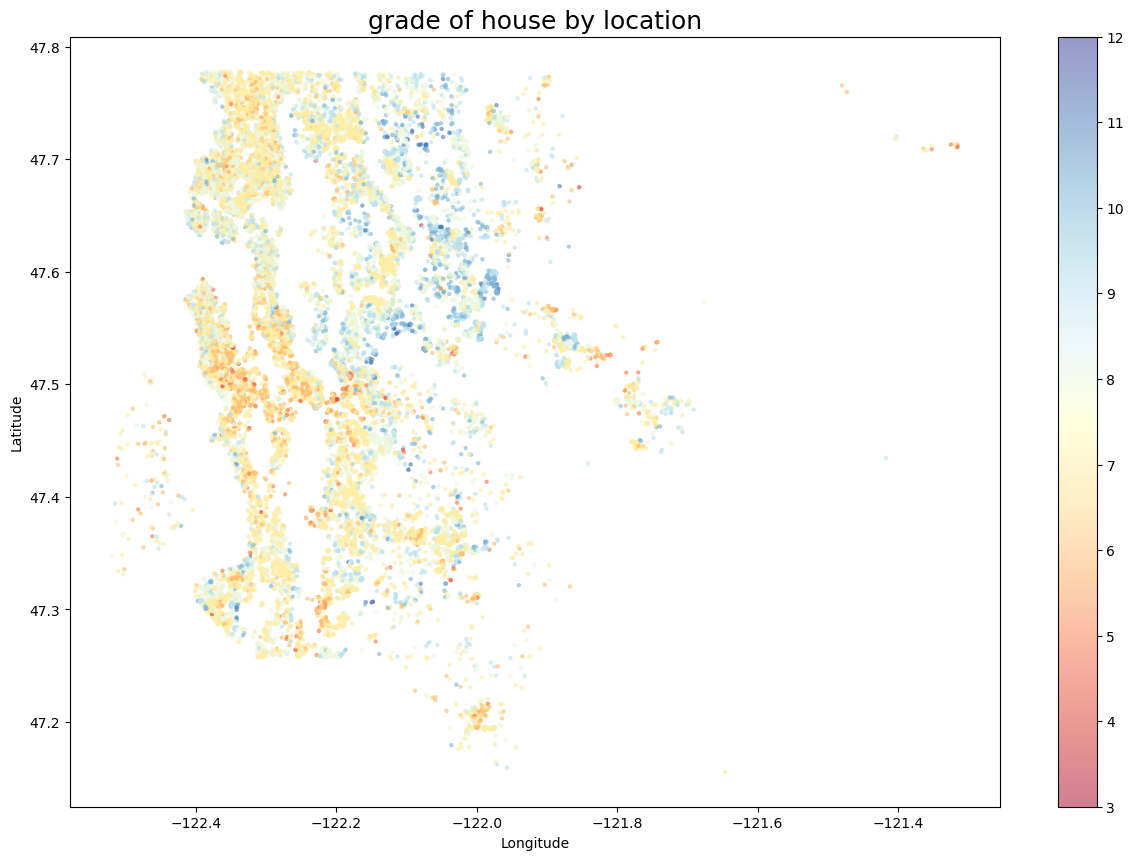

In [ ]:
locator(data, 'lat', 'long', 'grade')

*Location and condition*
- Condition of houses 3 and above are found all over the King County,  which is good for investors as they do not have to spend money for bettering the condition 

<ipython-input-27-22643a59bf28>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('RdYlBu')


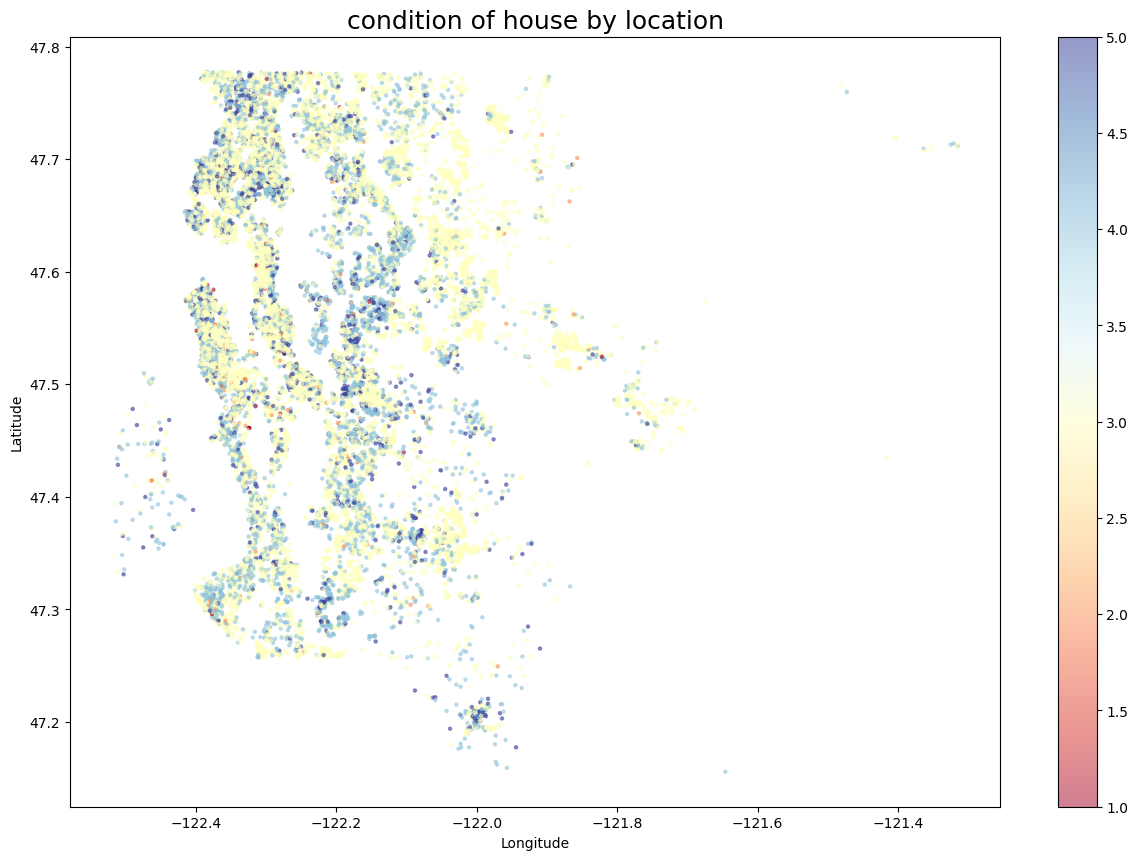

In [ ]:
locator(data, 'lat', 'long', 'condition')

*Location and zipcode_groups*
- Condition of houses 3 and above are found all over the King County, which is good for investors as they do not have to spend money for bettering the condition 

<ipython-input-27-22643a59bf28>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('RdYlBu')


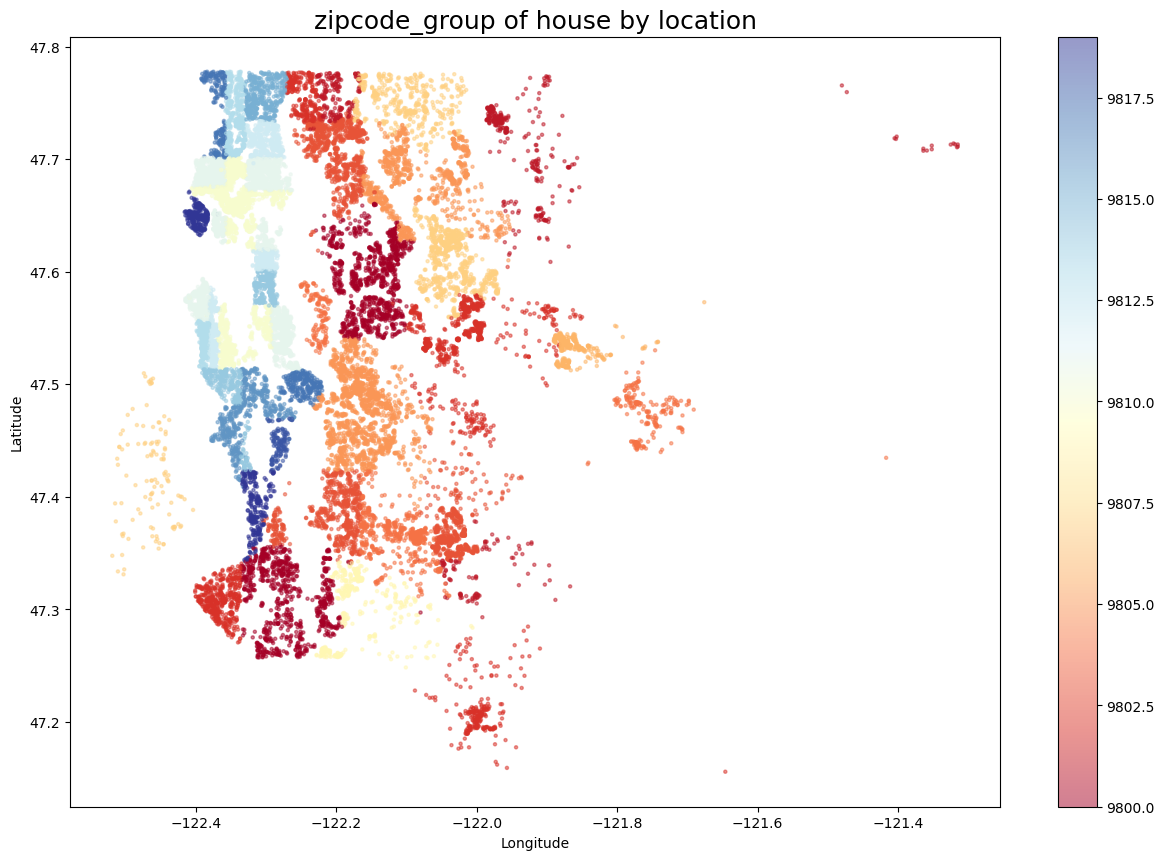

In [ ]:
locator(data, 'lat', 'long', 'zipcode_group')

### Dealing with the missing values
- As we saw in the EDA notebook, there were missing values in 3 variables: waterfront,view and yr_renovated. 
- Both waterfront and view has maximum values with level=0, so substituting the missing values with zero. 
- For yr_renovated feature, majority of the houses were not renovated, so populating the missing with zero

In [ ]:
data2=data.fillna(0)

## Feature Engineerng

Feature Engineering is an important step because this helps the model to get more information and thus predicting better

Creating few features based on categorical features :

Creating a variable where a house has both a waterfront and a view
Age of the building - how is is house price related to the age of the building
Whether the house has been renovated : whether house price gets impacted for ever being renovated or not?
If the house has a basement : whether house price gets impacted with having a basement or not?
Size of an average room in sq ft : how is is house price related to the average size of a room

House with both waterfront and a view

-- Based on the EDA notebook, house with a waterfront or a view other than 0, hold less than 5% of population. This variable can denote how expensive a house can be.

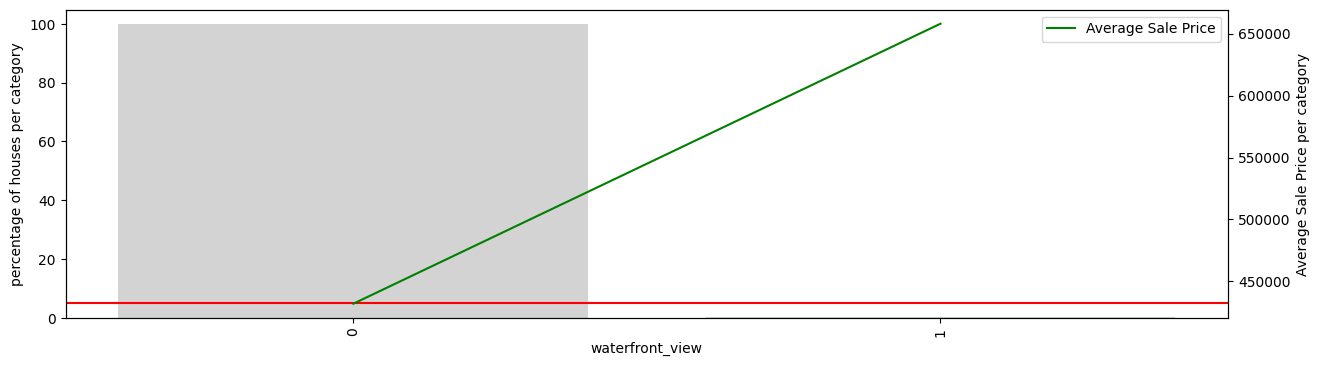

In [ ]:
data2['waterfront_view']=np.where((data2['waterfront']==1) & ((data2['view']>=1) & (data2['view']>=4)),1,0);

temp_df = calculate_mean_target_per_category(data2, 'waterfront_view')
plot_categories(temp_df,'waterfront_view')

Age of the building- The age of house is not showing any relation with the house price

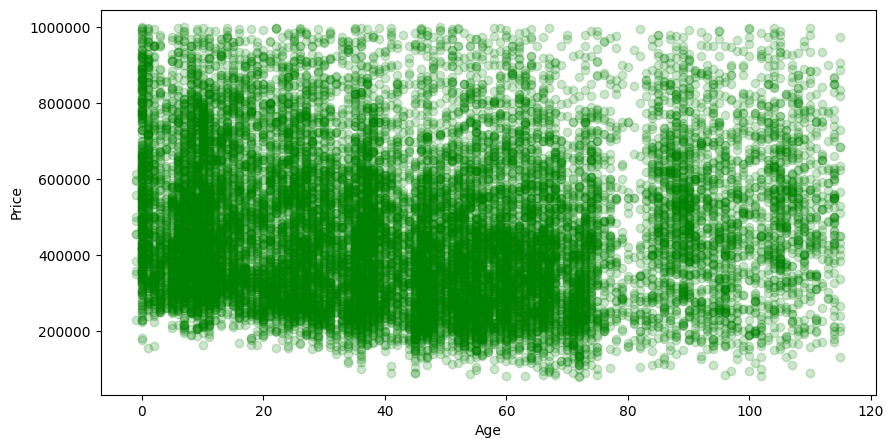

In [ ]:
data2['sale_yr']=data2['date'].dt.year
data2['age']=data2['sale_yr']-data2['yr_built']
plt.figure(figsize=(10, 5))
plt.scatter(x='age',y='price',data=data2,alpha=0.2,c='green')
plt.xlabel("Age")
plt.ylabel("Price")
plt.ticklabel_format(style='plain', axis='y') ;

**Has the apartment ever been renovated?** - Variable showing houses being renovated and how the house is impacted. As showed by the following graph, renovated house has higher price value

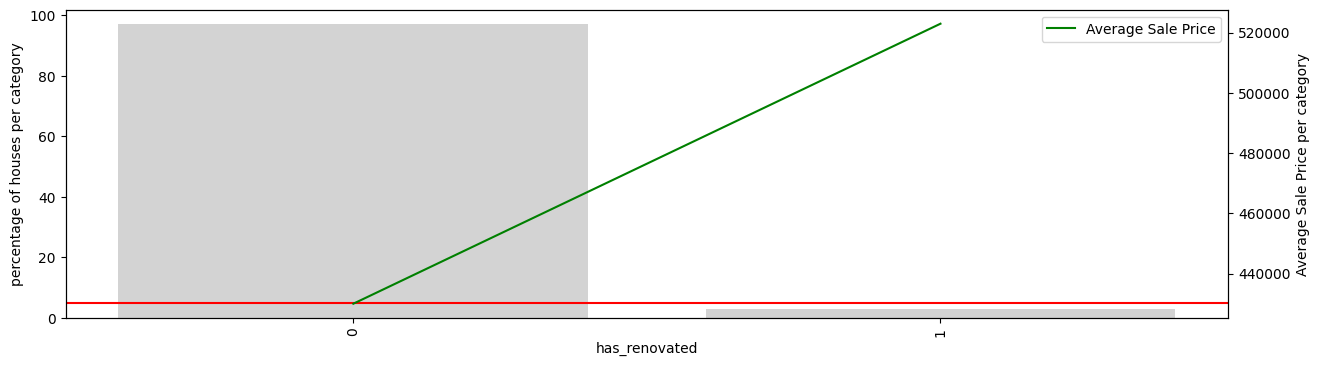

In [ ]:
data2['has_renovated']=np.where(data2['yr_renovated']==0,0,1)
temp_df = calculate_mean_target_per_category(data2, 'has_renovated')
plot_categories(temp_df,'has_renovated')

**House with a basement ? **- Variable showing houses having a basement and how the house is impacted. As showed by the following graph, a house with basement has higher price value

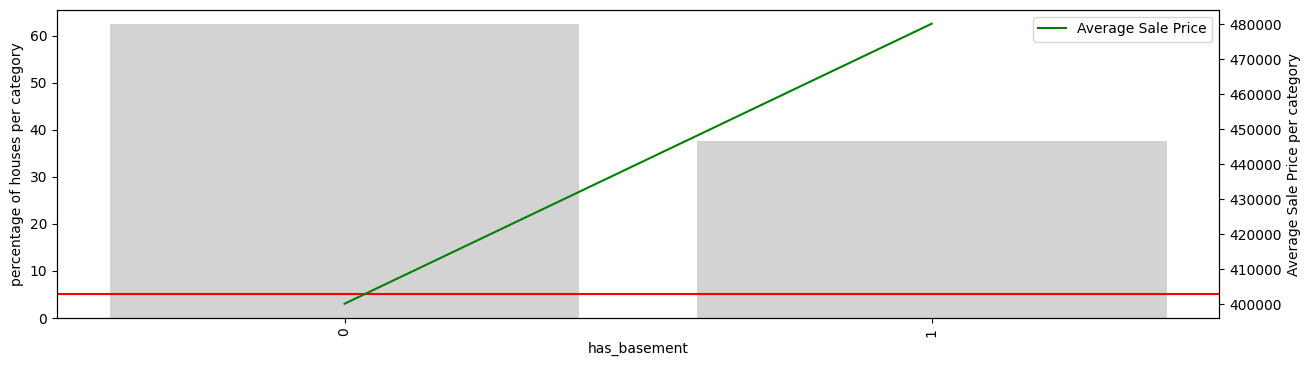

In [ ]:
data2['has_basement']=np.where(data2['sqft_basement']==0,0,1)
temp_df = calculate_mean_target_per_category(data2, 'has_basement')
plot_categories(temp_df,'has_basement')

**Average size of a room (sqft) **- Deriving a variable how big a room is on average and how does it impact house price. Below graph shows, these two variables are linear in nature.

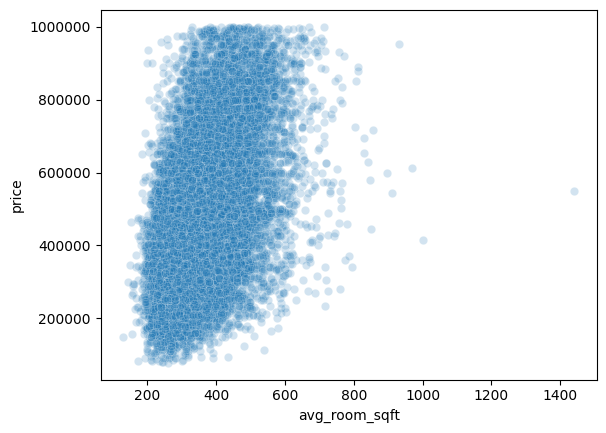

In [ ]:
data2['avg_room_sqft']=data2['sqft_living']/(data2['bedrooms']+data2['bathrooms'])
sns.scatterplot(x='avg_room_sqft',y='price',data=data2,alpha=0.2)
plt.ticklabel_format(style='plain', axis='y') ; 

# Data Preprocessing

### Dropping irrevalent variables

Dropping few variables which are not needed anymore and other variables are already been derived

In [ ]:
drop_var=['yr_built','yr_renovated','zipcode','sale_yr']
data3=data2.drop(drop_var,axis=1)

###Dummy creation for categorical variables which not one-hot encoded

Creating dummies for the zipcode group and the month variable. This is an important step so that each levels of the categorical feature is given equal importance

In [ ]:
dummy_var=['zipcode_group','sale_mnth']
data4=pd.get_dummies(data=data3,columns=dummy_var,drop_first=True)
data4.head()

id       date   price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  7129300520 2014-10-13  221900         3     1.0000         1180      5650   
1  6414100192 2014-12-09  538000         3     2.2500         2570      7242   
2  5631500400 2015-02-25  180000         2     1.0000          770     10000   
3  2487200875 2014-12-09  604000         4     3.0000         1960      5000   
4  1954400510 2015-02-18  510000         3     2.0000         1680      8080   

   floors  waterfront   view  condition  grade  sqft_above  sqft_basement  \
0  1.0000      0.0000 0.0000          3      7        1180              0   
1  2.0000      0.0000 0.0000          3      7        2170            400   
2  1.0000      0.0000 0.0000          3      6         770              0   
3  1.0000      0.0000 0.0000          5      7        1050            910   
4  1.0000      0.0000 0.0000          3      8        1680              0   

      lat      long  sqft_living15  sqft_lot15  waterfront_view  age  \
0 47.5112 -122.2570           1340        5650                0   59   
1 47.7210 -122.3190           1690        7639                0   63   
2 47.7379 -122.2330           2720        8062                0   82   
3 47.5208 -122.3930           1360        5000                0   49   
4 47.6168 -122.0450           1800        7503                0   28   

   has_renovated  has_basement  avg_room_sqft  zipcode_group_9801  \
0              0             0       295.0000                   0   
1              1             1       489.5238                   0   
2              0             0       256.6667                   0   
3              0             1       280.0000                   0   
4              0             0       336.0000                   0   

   zipcode_group_9802  zipcode_group_9803  zipcode_group_9804  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   1                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   zipcode_group_9805  zipcode_group_9806  zipcode_group_9807  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   1   

   zipcode_group_9809  zipcode_group_9810  zipcode_group_9811  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   zipcode_group_9812  zipcode_group_9813  zipcode_group_9814  \
0                   0                   0                   0   
1                   1                   0                   0   
2                   0                   0                   0   
3                   0                   1                   0   
4                   0                   0                   0   

   zipcode_group_9815  zipcode_group_9816  zipcode_group_9817  \
0                   0                   0                   1   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   zipcode_group_9818  zipcode_group_9819  sale_mnth_2  sale_mnth_3  \
0                   0                   0            0            0   
1                   0                   0            0            0   
2                   0                   0          

### Correlation of price with other features

Creating a correlation chart to finally see which variables are correlated to price variable. The graph shows features such as sqft_living,number of bathrooms,grade are higly correlated with price

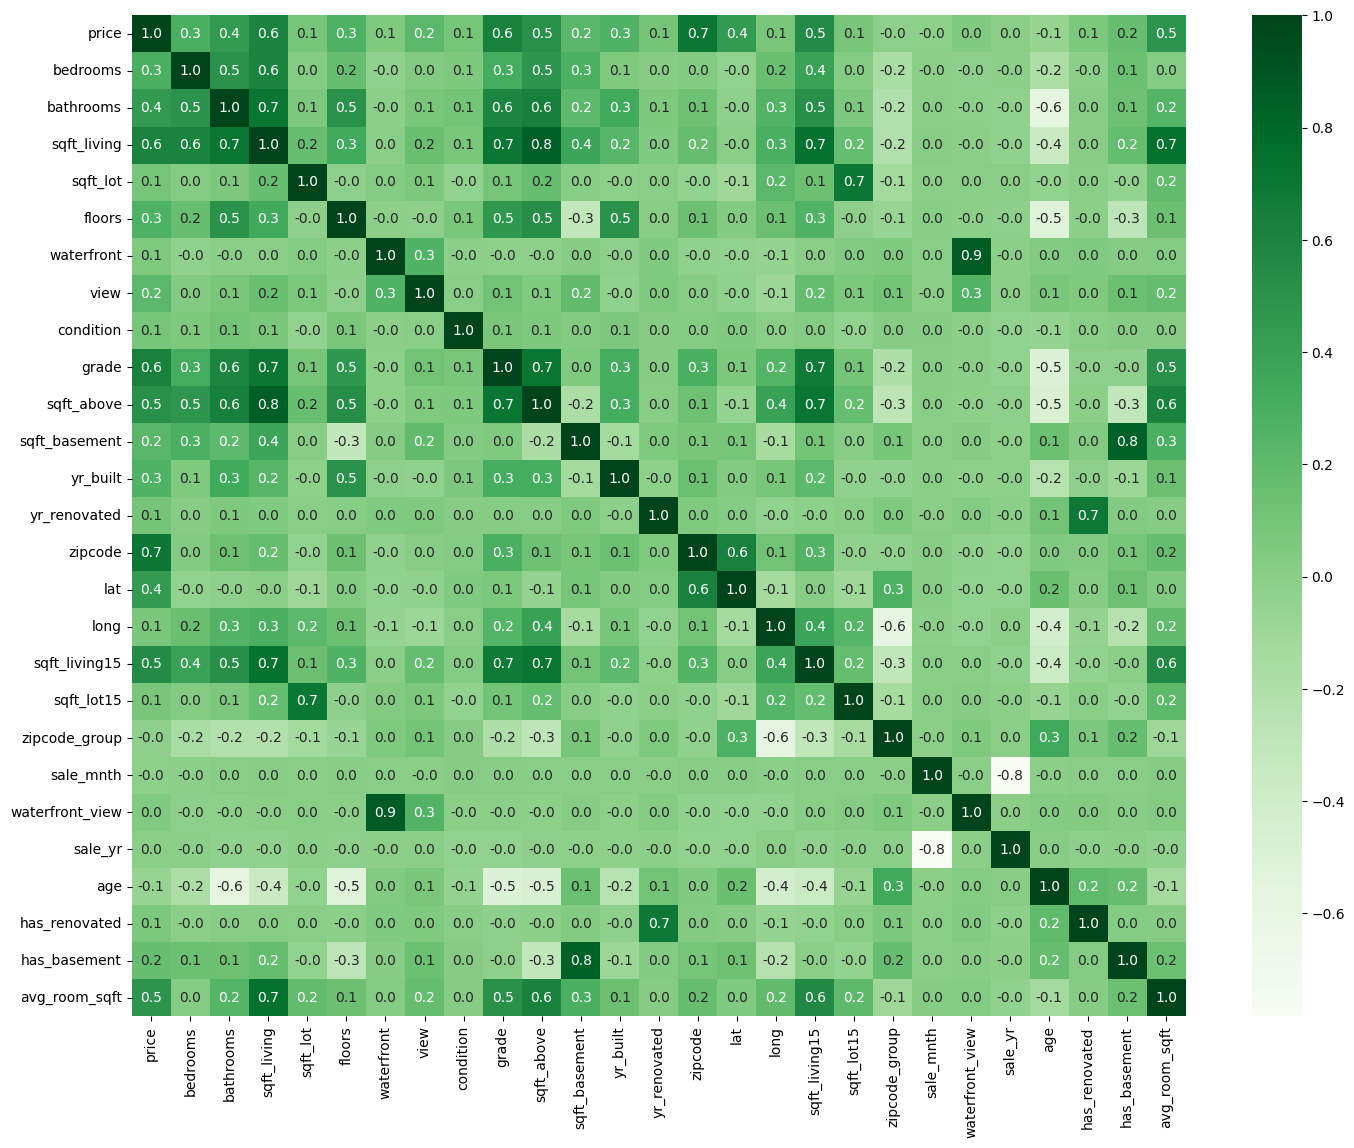

In [ ]:
categorical_vars=['waterfront', 'view', 'condition', 'grade', 'waterfront_view',
                  'yr_built','yr_renovated','zipcode','sale_yr','has_renovated', 'has_basement']
data_corr=data2[:]
for cat in categorical_vars:
    means=data_corr.groupby(cat)['price'].mean()
    data_corr[cat] = data_corr[cat].map(means)
fig = plt.figure(figsize=(17, 13))
features=data_corr.iloc[:,2:].columns
sns.heatmap(data_corr[features].corr(), cmap='Greens',annot=True,fmt='.1f',)
plt.xticks(rotation=90)
plt.show()

#Model building

In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
pd.set_option('display.max_columns', 1000) # shows all the columns
pd.set_option('display.float_format', lambda x: '%.4f' % x) # displays outputs with 1 decimal
pd.set_option('display.max_rows', 10000) # shows all the rows
%matplotlib inline

### Creating a baseline model using the median of house price across the zipcode groups
-- this is the most simple prediction of a house price. When no ML model is in place, the price of a house is the median price of all the houses in that zipcode group to which this house belongs. 
#### The evaluation metric for the model used is Mean Absolute error which measures how far away is our prediction in target variable's units which is dollar ($) in our case

- After running the below code, we see the MAE of the baseline model is 147222  which explains that our baseline model prediction of a house price is on average a $147K far from actual price

In [ ]:
zipcode_median_price=data3.groupby('zipcode_group')['price'].median()
zipcode_median_price_dict=zipcode_median_price.to_dict()
data4['zip_median_price'] = data3['zipcode_group'].map(zipcode_median_price_dict)
drop_vars2=['id', 'date','price','zip_median_price']
features=data4.drop(drop_vars2,axis=1)
target=data4[['price','zip_median_price']]
X_train, X_validation, y_train, y_validation = train_test_split(features,target, test_size=0.30, random_state=42,shuffle = True)
y_validation2=y_validation['price']
y_pred=y_validation['zip_median_price']
print("MAE for the baseline model tested on test set : ",mean_absolute_error(y_validation2, y_pred))

MAE for the baseline model tested on test set :  147222.607593885


#### To further improve this model, we now introduce complex models in order to achieve better predictions. Since this is a regression task, we have chosen Linear Regression, Decision Tree, Random Forest and Gradient Boosting

**Splitting the main data into train and validation data, where we finalise the model using the training data and finally use the validation data to see how our model performs on unseen data. This is important so that we know, how our model makes prediction on the price, when a new house with these features comes into the market**

### Final data and train-test-split

In [ ]:
drop_vars3=['zip_median_price']
data5=data4.drop(drop_vars3,axis=1)

In the below code, we now split the data in training and validation sets. Keeping 70% of the data as training and keeping aside 30% for validation to check how our model performs on never-seen data.

In [ ]:
feature=data5.iloc[:,3:]                 
target=data5['price']
X_train, X_validation, y_train, y_validation = train_test_split(features,target, test_size=0.30, random_state=42,shuffle = True)

In [ ]:
# The number of observations and columns in the train and validation datasets
X_train.shape, X_validation.shape, y_train.shape, y_validation.shape

((14042, 49), (6018, 49), (14042,), (6018,))

###  Spot-Check of Algorithms

Here we are trying to see which algorithms out of the four ( Linear Regression, Decision Tree, Random Forest and Gradient Boosting) will predict the best with lowest error. We cross validate our training data with 5 folds, get errors on each fold, and finally average those error so that we are really sure how the model performs for every record of the data. There can be variation in the distribution of the data and so cross validation is a preventive measure in overfitting of the model.

#### Create model container and add models to it

In [ ]:
#defining the model container
class ModelContainer:
    def __init__(self, models=[]):
        '''initializes model list and dicts'''
        self.models = models
        self.best_model = None
        self.mean_mae = {}
        
    def add_model(self, model):
        self.models.append(model)

    def cross_validate(self):
    
        '''cross validate models using given data'''
        for model in self.models:
            neg_mae = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
            self.mean_mae[model] = abs(neg_mae.mean())
    def select_best_model(self):
        '''select model with lowest mae'''
        self.best_model = min(self.mean_mae, key=self.mean_mae.get)
        
    def best_model_fit(self, x_features, target):
        '''fits best model'''
        self.best_model.fit(x_features, target)
    
    def print_summary(self):
        '''prints summary of models, best model, and feature importance'''
        print('\nModel Summaries:\n')
        for model in models.mean_mae:
            print('\n', model, '- MAE:', models.mean_mae[model])
        print('\nBest Model:\n', models.best_model)

In [ ]:
#creating model container
models = ModelContainer()
models.add_model(LinearRegression())
models.add_model(DecisionTreeRegressor(random_state=42))
models.add_model(RandomForestRegressor(random_state=42))
models.add_model(GradientBoostingRegressor(random_state=42))

#### Cross validate models,and select the best model

In [ ]:
models.cross_validate() 
models.select_best_model()
models.print_summary()


Model Summaries:


 LinearRegression() - MAE: 75810.49874351376

 DecisionTreeRegressor(random_state=42) - MAE: 75808.14602678713

 RandomForestRegressor(random_state=42) - MAE: 52940.237496269365

 GradientBoostingRegressor(random_state=42) - MAE: 57830.4770664954

Best Model:
 RandomForestRegressor(random_state=42)


**From the above exercise, we see that Random Forest works the best for our data with the lowest MAE. This means our prediction is on average just $52K away from our prediction**

We will now move on with hypertuning the parameters of Random Forest. Model hyperparametrs tell us how the model is structured , it controls the behaviour of the training algorithm. There is no one specific way on how to tune hyperparameters, but the best way is to use GridSearchCV. Here we define multiple values for the hyperparameters and the GridSearch chooses the best hyperparameter values based on the lowest Mean Absolute Error

### Hypertuning the Random Forest model and getting the final prediction on the test dataset

In [ ]:
# Number of trees in random forest
n_estimators=[100,200,300]
# Number of features to consider at every split
max_features = [ 0.7, 0.2]
# Maximum number of levels in tree
max_depth = [10,20 ]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2]
# Creating the random grid
param_grid = {'n_estimators': n_estimators, 'max_features': max_features,'max_depth': max_depth, 
              'min_samples_leaf': min_samples_leaf  }
rf_grid=GridSearchCV(estimator =models.best_model,param_grid=param_grid,scoring='neg_mean_absolute_error', 
                     n_jobs=-1, cv=5, verbose=2)
# Fit the random search model on training data and getting the best estimator
rf_grid.fit(X_train, y_train)
best_fit=rf_grid.best_estimator_
best_fit

Fitting 5 folds for each of 24 candidates, totalling 120 fits


RandomForestRegressor(max_depth=20, max_features=0.7, n_estimators=300,
                      random_state=42)

Now, we fit our training data with the best estimator and test it on the validation/unseen data

In [ ]:
# Fitting the training data with the best estimator ans getting the mean square error
best_fit.fit(X_train, y_train)
y_pred=best_fit.predict(X_validation)
# calculating the mean absolute error
print(mean_absolute_error(y_validation, y_pred))
feature_imp=best_fit.feature_importances_

51207.258987008594


In [ ]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_validation, y_pred)

0.8623494302271479

The above exercise tells us that the after tuning the hyperparameters and then testing on unseen data, the **final RF model's prediction is just a $51K away  from the actual value of the house**. Also, the **model explains 86% of the variablity of price across the dataset.**

Also plotting the residuals, that is plotting the predicted and actual values, we see there is positive correlation between them. For a good fit, the points should be close to the fitted line. There are few outliers, which means that some predictions are inaccurate, however the positive correlation demostrates an overall good fit.

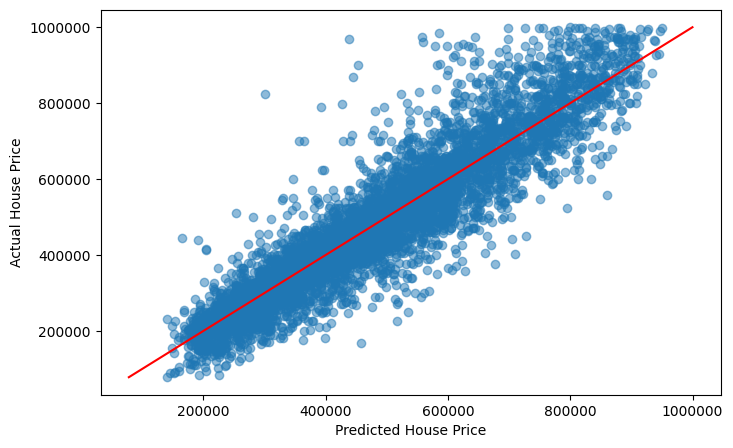

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(y_pred,y_validation,alpha=.5)
plt.xlabel("Predicted House Price")
plt.ylabel("Actual House Price")
p1 = max(max(y_pred), max(y_validation))
p2 = min(min(y_pred), min(y_validation))
plt.plot([p1, p2], [p1, p2], 'r-')
plt.ticklabel_format(style='plain', axis='x') ;
plt.ticklabel_format(style='plain', axis='y') ;

### Important features of the model 

After fitting the model, we now look for which features has contributed the most to this model. Investors can take an account of this and pay greater attention to these features while investing in selling a house or acquiring a house in the King County

We see that features like latitude and longitude i.e the location of the house,the size of the interior living area, grade and condition of the house,  and average size of a room are important room to look a while predicting the house price at King County

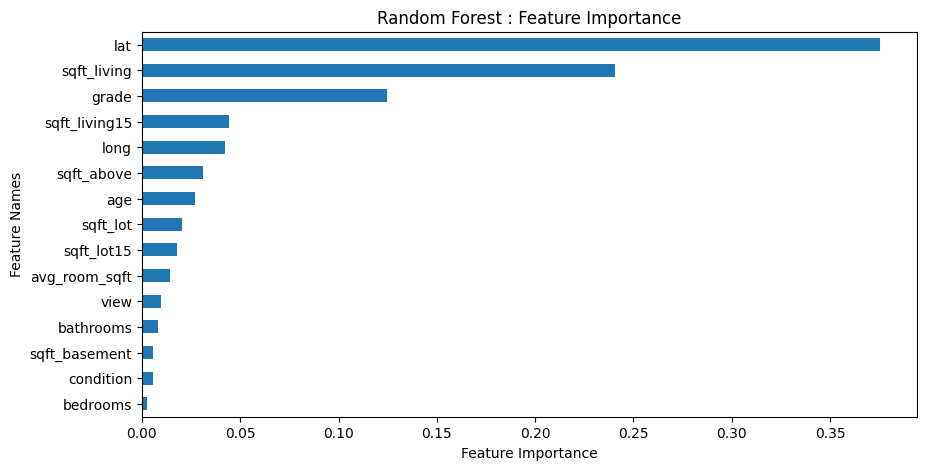

In [ ]:
plt.figure(figsize=(10,5))
(pd.Series(feature_imp, index=X_train.columns).nlargest(15).plot(kind='barh')).invert_yaxis()
plt.xlabel("Feature Importance")
plt.ylabel("Feature Names");
plt.title("Random Forest : Feature Importance");